In [1]:
import sys
import numbers
import time
import math
import datetime as dt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from scipy import stats as ss
%matplotlib inline
from matplotlib import pyplot as plt
import statsmodels
import sktime
import metrics
import sklearn
from functools import reduce
import pmdarima as pmd
import statsmodels.api as sm
from scipy.stats import normaltest
import seaborn as sns
import plotly as ply
import cufflinks as cf
import chart_studio.plotly as py
import plotnine as p9
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, AutoARIMA, HoltWinters, AutoETS, AutoTheta, AutoCES

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.width', 80)
pd.set_option('display.max_columns', 12)

In [3]:
month = pd.read_csv('data/month.csv')
month_c = pd.read_csv('data/month_clean.csv')

In [4]:
month['ds'] = pd.to_datetime(month['ds'], format = '%Y-%m')
month_c['ds'] = pd.to_datetime(month_c['ds'], format = '%Y-%m')

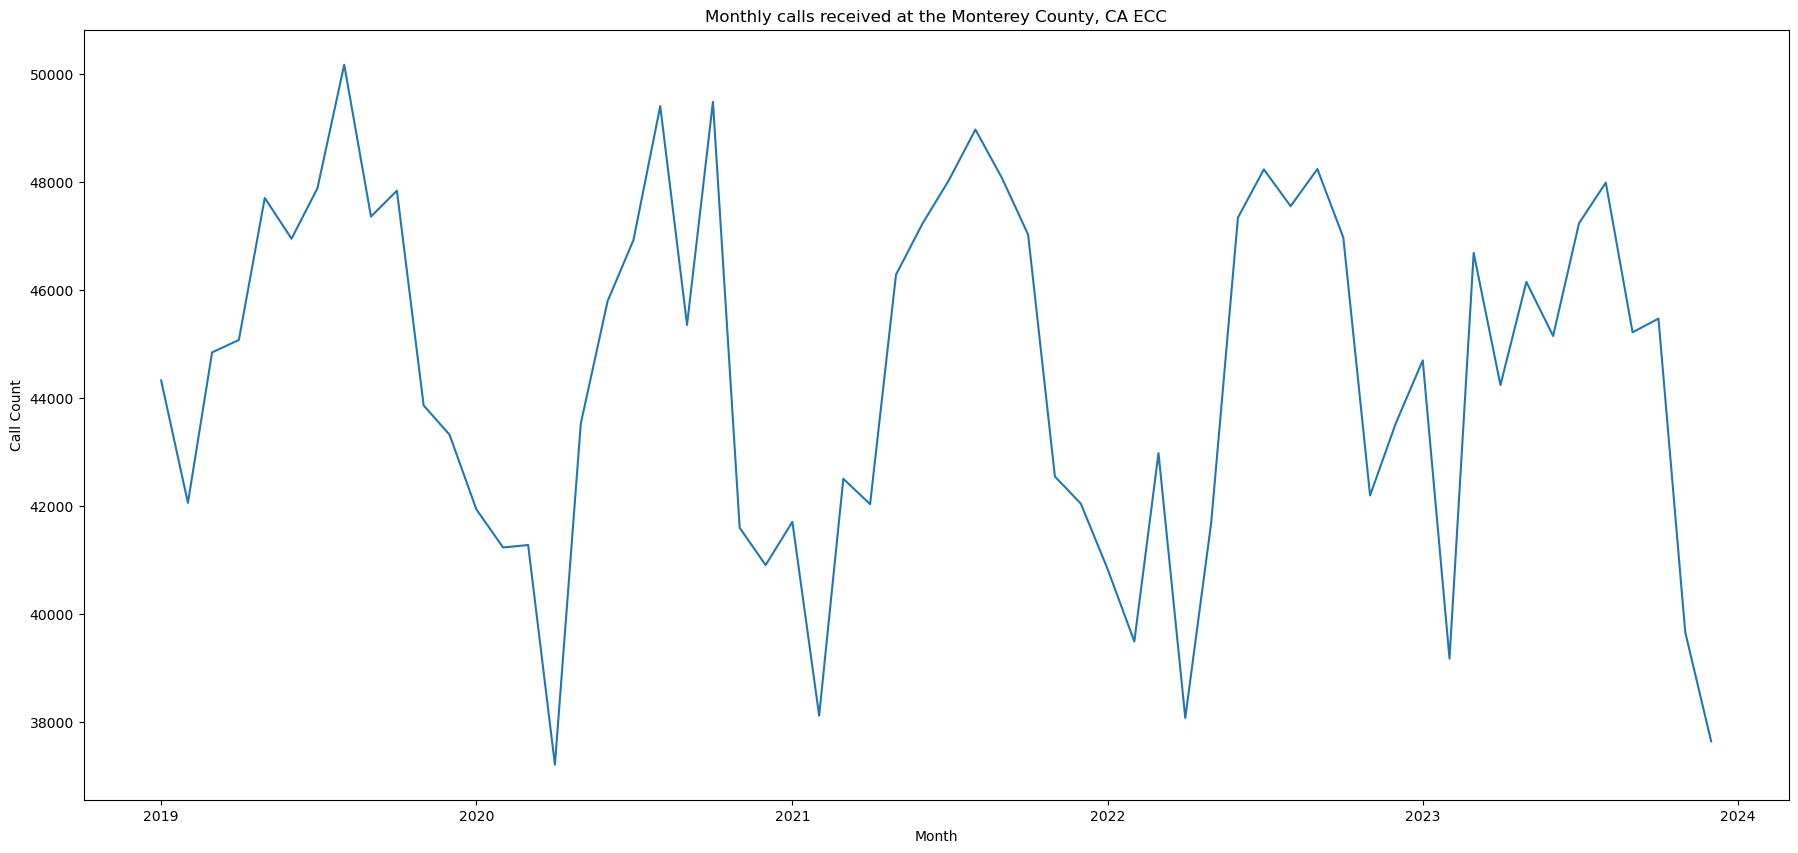

In [5]:
plt.figure(figsize=(22,10))
plt.plot(month.ds, month.mco)
plt.title("Monthly calls received at the Monterey County, CA ECC")
plt.xlabel("Month")
plt.ylabel("Call Count")
plt.show()

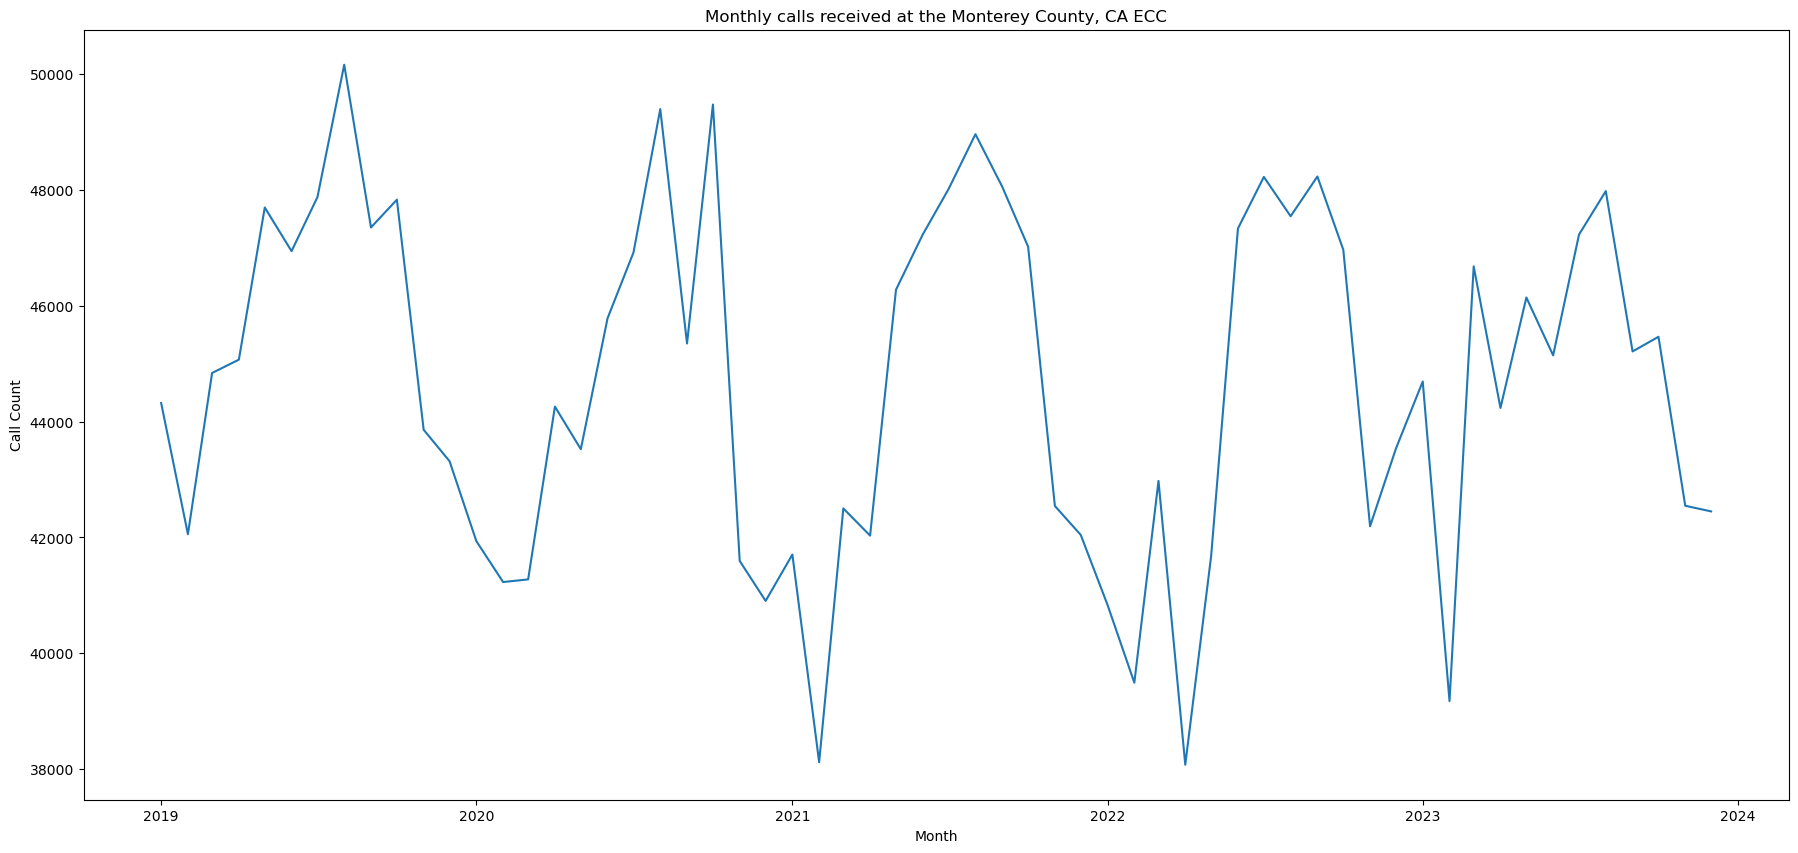

In [6]:
plt.figure(figsize=(22,10))
plt.plot(month_c.ds, month_c.mco)
plt.title("Monthly calls received at the Monterey County, CA ECC")
plt.xlabel("Month")
plt.ylabel("Call Count")
plt.savefig('mcom.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
season_mcom = seasonal_decompose(month['mco'], model='additive', period=12)
season_mcom2 = seasonal_decompose(month['mco'], model='additive', period=12)

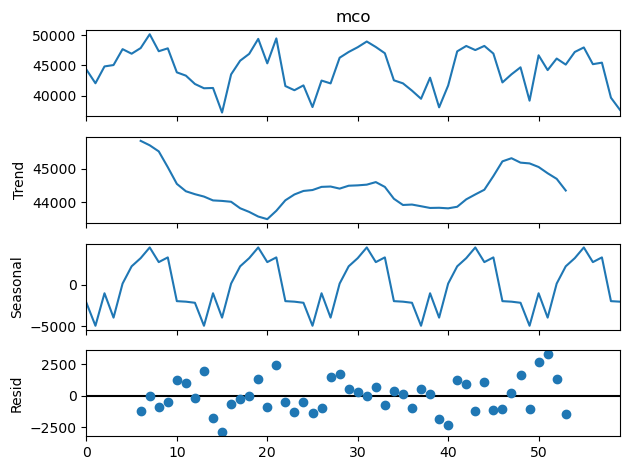

In [8]:
season_mcom.plot()
plt.show()

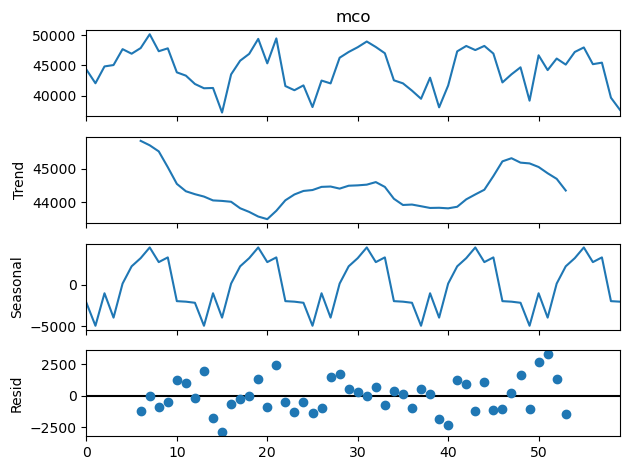

In [9]:
season_mcom2.plot()
plt.savefig('mcom_decomp.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
adftest_mcom = adfuller(month['mco'], autolag='AIC', regression='ct')
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest_mcom[0])
print("P-Value:", adftest_mcom[1])
print("Number of lags:", adftest_mcom[2])
print("Number of observations:", adftest_mcom[3])
print("Critical Values:", adftest_mcom[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -4.072410766813694
P-Value: 0.006919723179739614
Number of lags: 7
Number of observations: 52
Critical Values: {'1%': -4.1443354969845245, '5%': -3.498585183773327, '10%': -3.1783837960855714}
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary


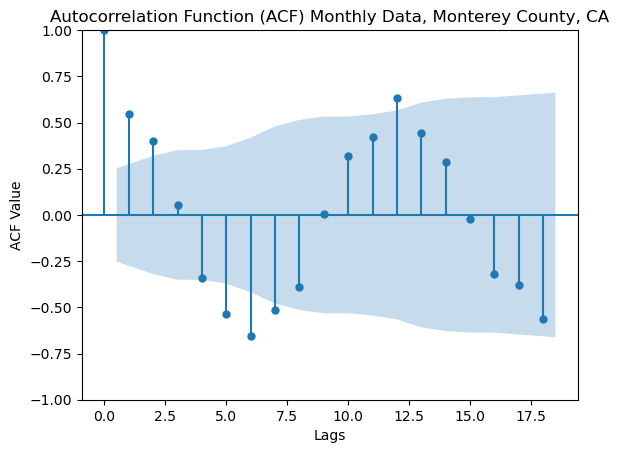

In [11]:
plot_acf(month_c['mco'])
plt.title("Autocorrelation Function (ACF) Monthly Data, Monterey County, CA")
plt.xlabel("Lags")
plt.ylabel("ACF Value")
plt.show()

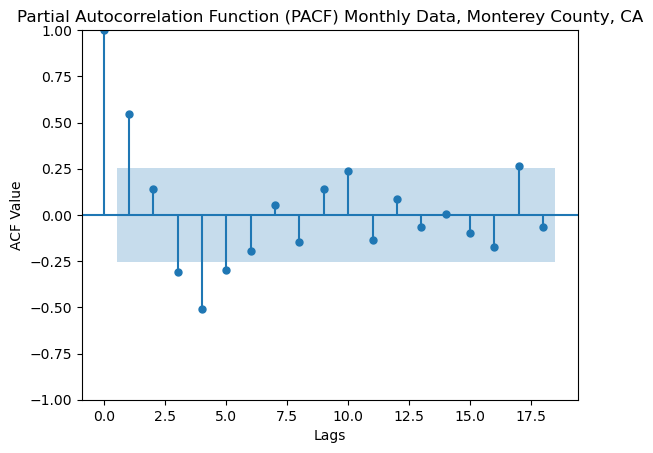

In [12]:
plot_pacf(month_c['mco'])
plt.title("Partial Autocorrelation Function (PACF) Monthly Data, Monterey County, CA")
plt.xlabel("Lags")
plt.ylabel("ACF Value")
plt.show()

In [13]:
mcom = pd.DataFrame(month_c, columns=['ds', 'mco'])
tr_mcom = mcom[:48]
tst_mcom = mcom[48:]

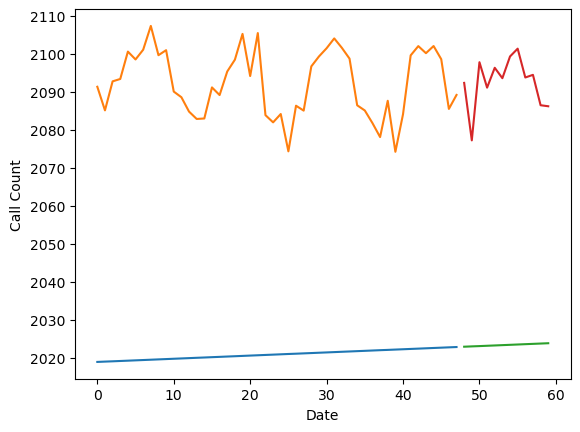

In [14]:
plt.plot(tr_mcom)
plt.plot(tst_mcom)
plt.title = ("Test and Training Split of Monthly Data for Monterey County, CA")
plt.xlabel("Date")
plt.ylabel("Call Count")
plt.show()

In [15]:
tr_mcom_model1 = pmd.auto_arima(tr_mcom['mco'],
                      m=12,               # frequency of series
                      seasonal=True,  # TRUE if seasonal series
                      d=None,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=0, start_q=0, # minimum p and q
                      max_p=12, max_q=12, # maximum p and q
                      D=None,             # let model determine 'D'
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

# print model summary
print(tr_mcom_model1.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,1,1)[12]             : AIC=675.259, Time=0.11 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=675.350, Time=0.02 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=665.458, Time=0.07 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=666.240, Time=0.08 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=668.170, Time=0.04 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=667.447, Time=0.11 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=667.410, Time=0.20 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=665.527, Time=0.06 sec
 ARIMA(1,2,0)(2,1,1)[12]             : AIC=669.458, Time=0.15 sec
 ARIMA(0,2,0)(1,1,0)[12]             : AIC=673.280, Time=0.04 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=672.582, Time=0.04 sec
 ARIMA(1,2,1)(1,1,0)[12]             : AIC=inf, Time=0.18 sec
 ARIMA(0,2,1)(1,1,0)[12]             : AIC=660.400, Time=0.20 sec
 ARIMA(0,2,1)(0,1,0)[12]             : AIC=661.847, Time=0.07 sec
 ARIMA(0,2,1)(2,1,0)[12]             

In [16]:
mcom_pred1 = pd.DataFrame(tr_mcom_model1.predict(n_periods=len(tst_mcom)), index=tst_mcom.index)
mcom_pred1.columns = ['predicted_volume']
mcom_pred1

,predicted_volume
48,"43,029.36"
49,"41,697.97"
50,"45,703.77"
51,"41,896.40"
52,"45,984.81"
53,"51,248.96"
54,"52,497.38"
55,"52,456.90"
56,"53,259.22"
57,"52,406.39"


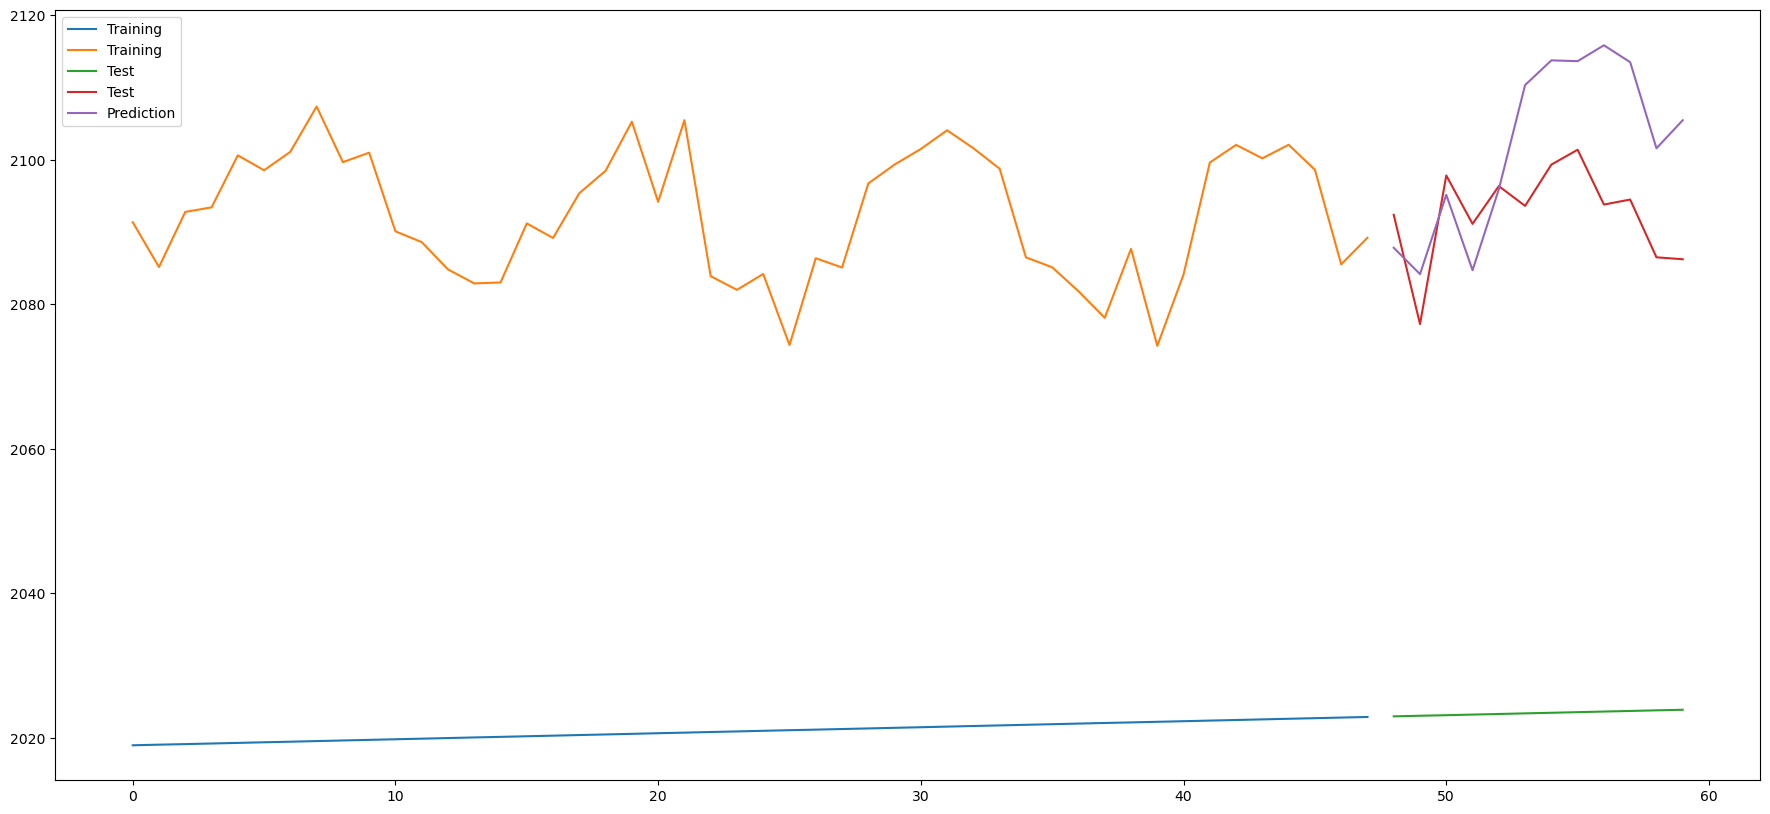

In [17]:
plt.figure(figsize=(22,10))
plt.plot(tr_mcom, label="Training")
plt.plot(tst_mcom, label = "Test")
plt.plot(mcom_pred1, label = "Prediction")
plt.legend(loc="upper left")
plt.savefig("gcom_arima.png")
plt.show()

In [18]:
mcom_mae = mean_absolute_error(tst_mcom['mco'], mcom_pred1)
mcom_mae

4252.35516261814

In [19]:
mcom_mse = mean_squared_error(tst_mcom['mco'], mcom_pred1)
mcom_mse

24430671.975047603

In [20]:
mcom_r2 = r2_score(tst_mcom['mco'], mcom_pred1)
mcom_r2

-3.5336683769694757

In [21]:
mcom_sf = mcom
mcom_sf.rename(columns={'ds':'ds', 'mco':'y'}, inplace=True)
mcom_sf.insert(0, "unique_id", "M")

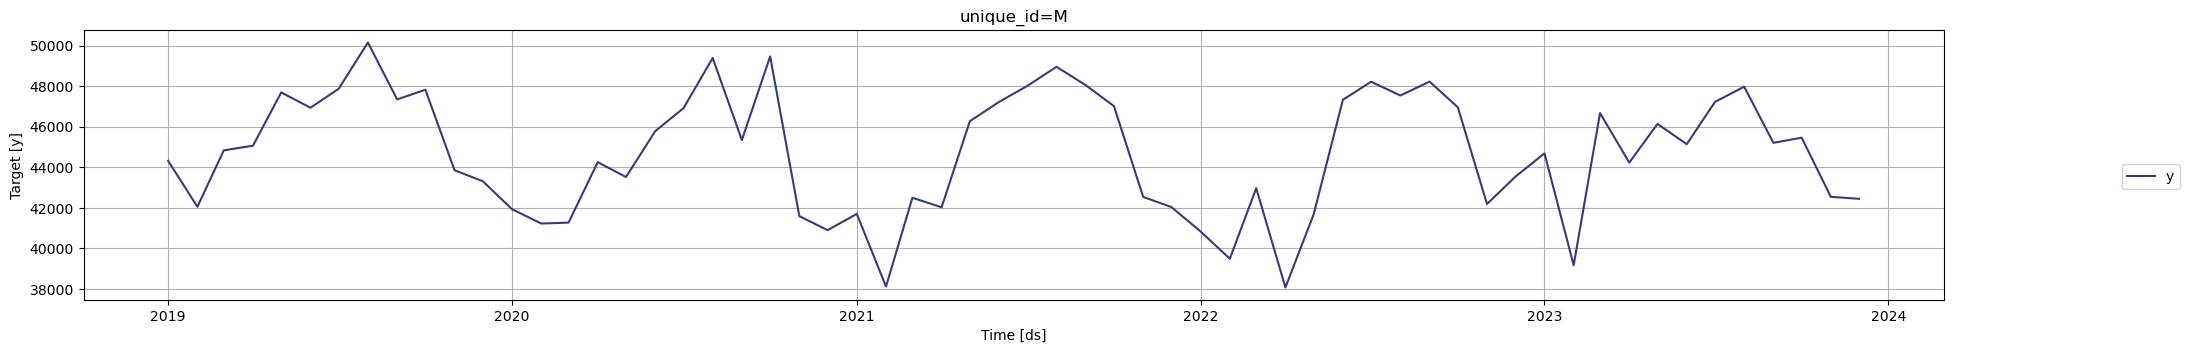

In [22]:
StatsForecast.plot(mcom_sf)

In [23]:
tr_mcom_sf = mcom_sf[:48]
tst_mcom_sf = mcom_sf[48:]

season_length = 12
horizon= 12

models = [
    AutoARIMA(season_length=season_length), # ARIMA model with automatic order selection and seasonal component
    AutoETS(season_length=season_length), # ETS model with automatic error, trend, and seasonal component
    AutoTheta(season_length=season_length), # Theta model with automatic seasonality detection
    AutoCES(season_length=season_length), # CES model with automatic seasonality detection
]

sf = StatsForecast(
    models=models, # models for forecasting
    freq='M',  # frequency of the data
    n_jobs=1  # number of jobs to run in parallel, -1 means using all processors
)

In [24]:
sf.fit(df=tr_mcom_sf) # Fit the models to the data using the fit method of the StatsForecast object

sf.fitted_ # Access fitted models from the StatsForecast object

Y_hat_mcom_sf = sf.predict(h=horizon) # Predict or forecast 'horizon' steps ahead using the predict method

Y_hat_mcom_sf.head() # Preview the first few rows of the forecasted data

,ds,AutoARIMA,AutoETS,AutoTheta,CES
unique_id,,,,,
M,2022-12-31,"41,102.68","41,471.49","41,237.17","41,298.40"
M,2023-01-31,"39,068.47","39,490.82","39,379.39","39,395.98"
M,2023-02-28,"42,830.48","42,307.17","42,016.65","42,025.36"
M,2023-03-31,"39,295.61","41,807.20","41,183.14","41,224.14"
M,2023-04-30,"43,102.10","44,509.42","43,569.14","43,601.54"


In [25]:
sn_models = [
    SeasonalNaive(season_length=12),
    HoltWinters()
]

sf_sn = StatsForecast(
    models = sn_models,
    freq = "MS",
    fallback_model = SeasonalNaive(season_length=1),
    n_jobs=-1
)

In [26]:
tr_mcom_model2 = sf_sn.forecast(df=tr_mcom_sf, h=12, level=[90,95])
tr_mcom_model2.head()

,ds,SeasonalNaive,SeasonalNaive-lo-90,SeasonalNaive-lo-95,SeasonalNaive-hi-90,SeasonalNaive-hi-95,HoltWinters,HoltWinters-lo-90,HoltWinters-lo-95,HoltWinters-hi-90,HoltWinters-hi-95
unique_id,,,,,,,,,,,
M,2023-01-01,"40,834.00","37,537.57","36,906.06","44,130.43","44,761.94","43,537.00","27,786.89","24,769.58","59,287.11","62,304.42"
M,2023-02-01,"39,492.00","36,195.57","35,564.06","42,788.43","43,419.94","43,537.00","27,786.89","24,769.58","59,287.11","62,304.42"
M,2023-03-01,"42,977.00","39,680.57","39,049.06","46,273.43","46,904.94","43,537.00","27,786.89","24,769.58","59,287.11","62,304.42"
M,2023-04-01,"38,075.00","34,778.57","34,147.06","41,371.43","42,002.94","43,537.00","27,786.89","24,769.58","59,287.11","62,304.42"
M,2023-05-01,"41,685.00","38,388.57","37,757.06","44,981.43","45,612.94","43,537.00","27,786.89","24,769.58","59,287.11","62,304.42"


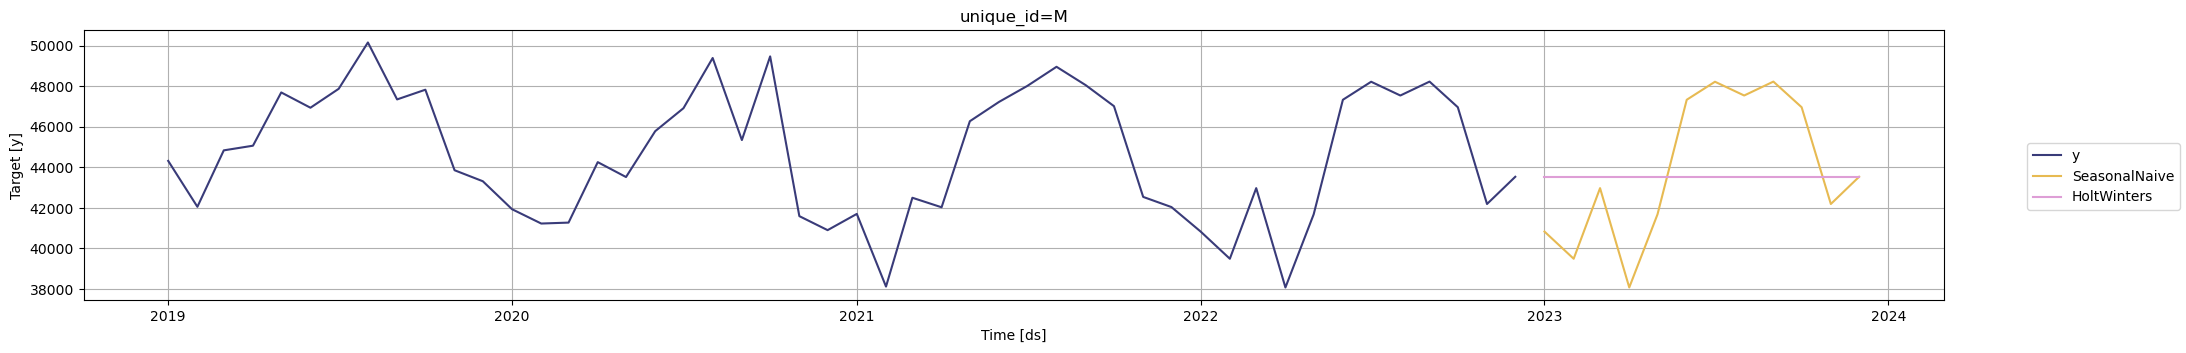

In [27]:
StatsForecast.plot(tr_mcom_sf, tr_mcom_model2)

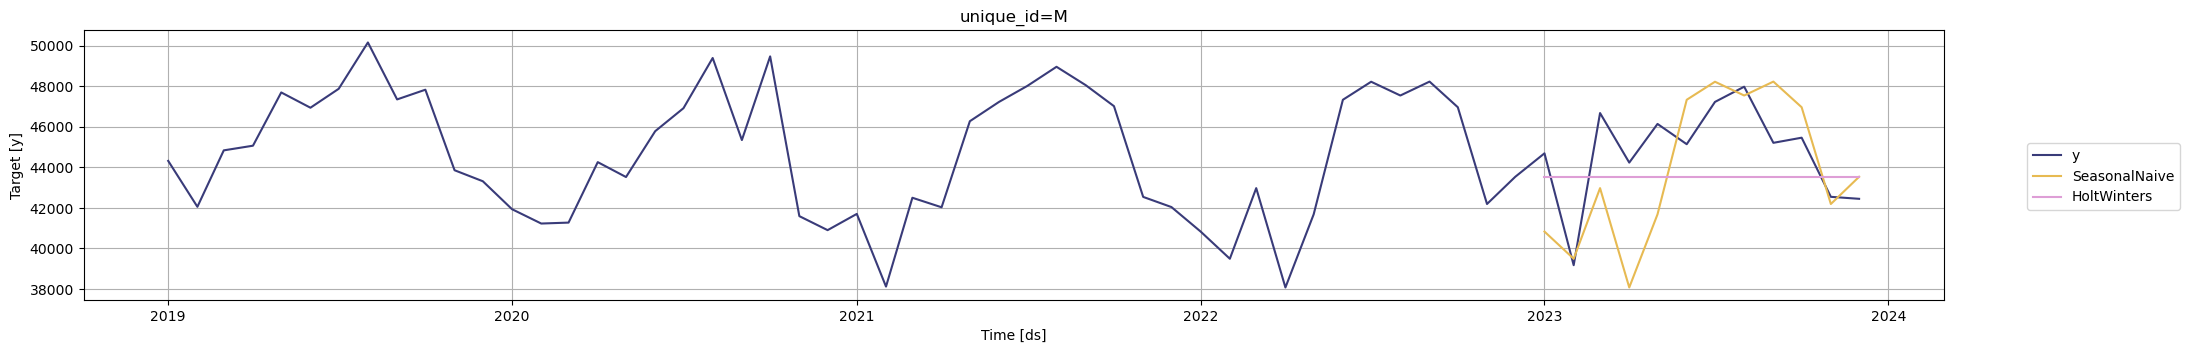

In [28]:
StatsForecast.plot(mcom_sf, tr_mcom_model2)

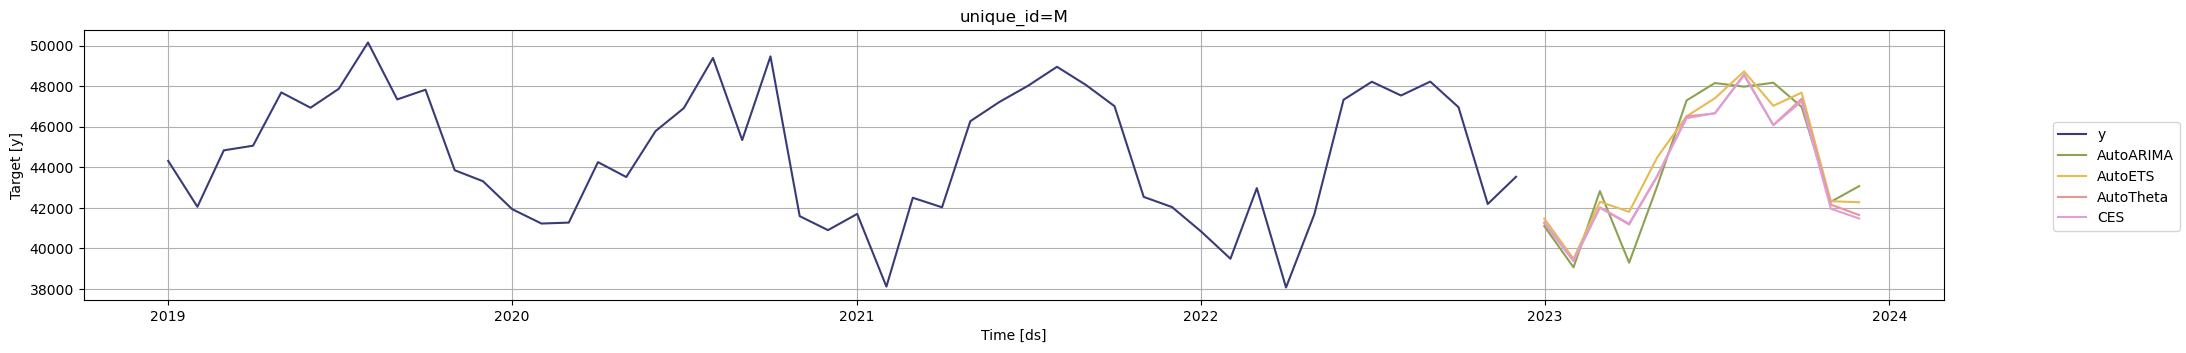

In [29]:
StatsForecast.plot(tr_mcom_sf, Y_hat_mcom_sf)

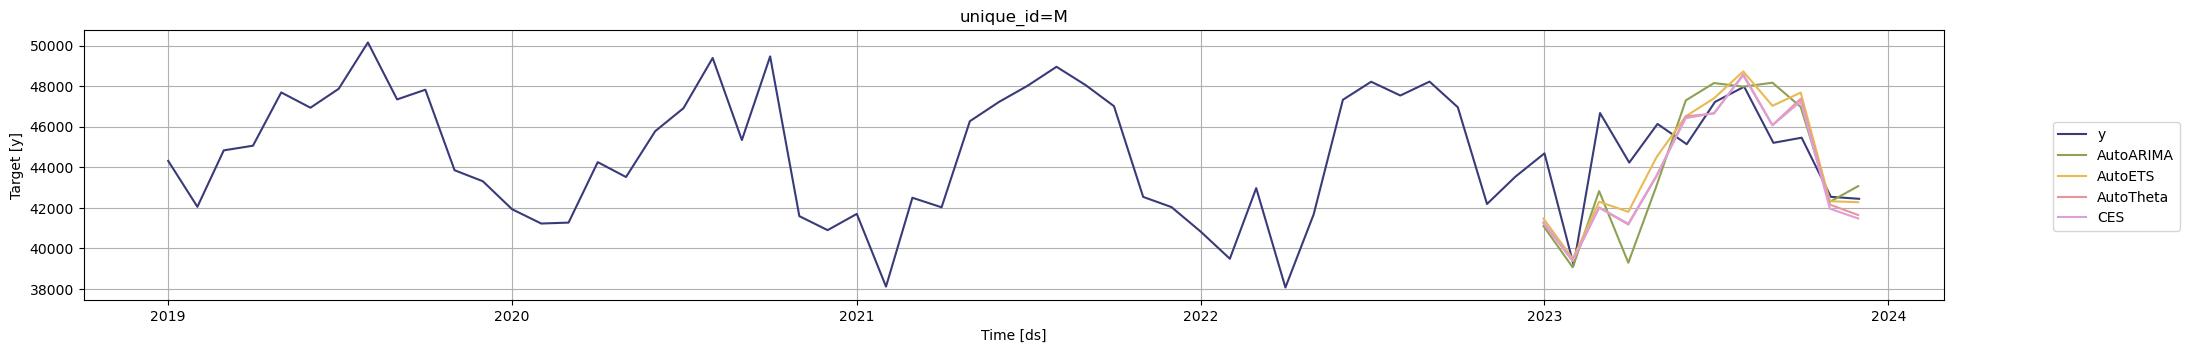

In [30]:
StatsForecast.plot(mcom_sf, Y_hat_mcom_sf)

In [31]:
mcom_sf1_r2 = r2_score(tst_mcom_sf['y'], tr_mcom_model2['SeasonalNaive'])
mcom_sf1_r2

-0.6278626918792725

In [32]:
mcom_sf2_r2 = r2_score(tst_mcom_sf['y'], Y_hat_mcom_sf['AutoARIMA'])
mcom_sf2_r2

-0.21418499946594238

In [33]:
mcom_sf3_r2 = r2_score(tst_mcom_sf['y'], Y_hat_mcom_sf['AutoETS'])
mcom_sf3_r2

0.2412007451057434

In [34]:
mcom_sf4_r2 = r2_score(tst_mcom_sf['y'], Y_hat_mcom_sf['AutoTheta'])
mcom_sf4_r2

0.10983240604400635

In [35]:
mcom_sf5_r2 = r2_score(tst_mcom_sf['y'], Y_hat_mcom_sf['CES'])
mcom_sf5_r2 

0.12901830673217773

In [36]:
from sklearn.metrics import mean_absolute_percentage_error as mape

In [37]:
mcom_mape = mape(tst_mcom['mco'], mcom_pred1)
mcom_mape

0.0953700507275078

In [38]:
mcom_sf1_mape = mape(tst_mcom_sf['y'], tr_mcom_model2['SeasonalNaive'])
mcom_sf1_mape

0.05185531463378487

In [39]:
mcom_sf2_mape = mape(tst_mcom_sf['y'], Y_hat_mcom_sf['AutoARIMA'])
mcom_sf2_mape

0.04419946783970855

In [40]:
mcom_sf3_mape = mape(tst_mcom_sf['y'], Y_hat_mcom_sf['AutoETS'])
mcom_sf3_mape

0.034397699990810875

In [41]:
mcom_sf4_mape = mape(tst_mcom_sf['y'], Y_hat_mcom_sf['AutoTheta'])
mcom_sf4_mape

0.03769167355178019

In [42]:
mcom_sf5_mape = mape(tst_mcom_sf['y'], Y_hat_mcom_sf['CES'])
mcom_sf5_mape

0.03762821715903177

In [43]:
from nixtla import NixtlaClient

In [44]:
nixtla_client = NixtlaClient(api_key = 'nixtla-tok-p2HkvvhK3qSPVd7fF9GfzYQlnFwItKuQOSg06j9qnV0WU1OuMTOo3FfiFuiYOgTyNjPwexwo2sMiqU9y')

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


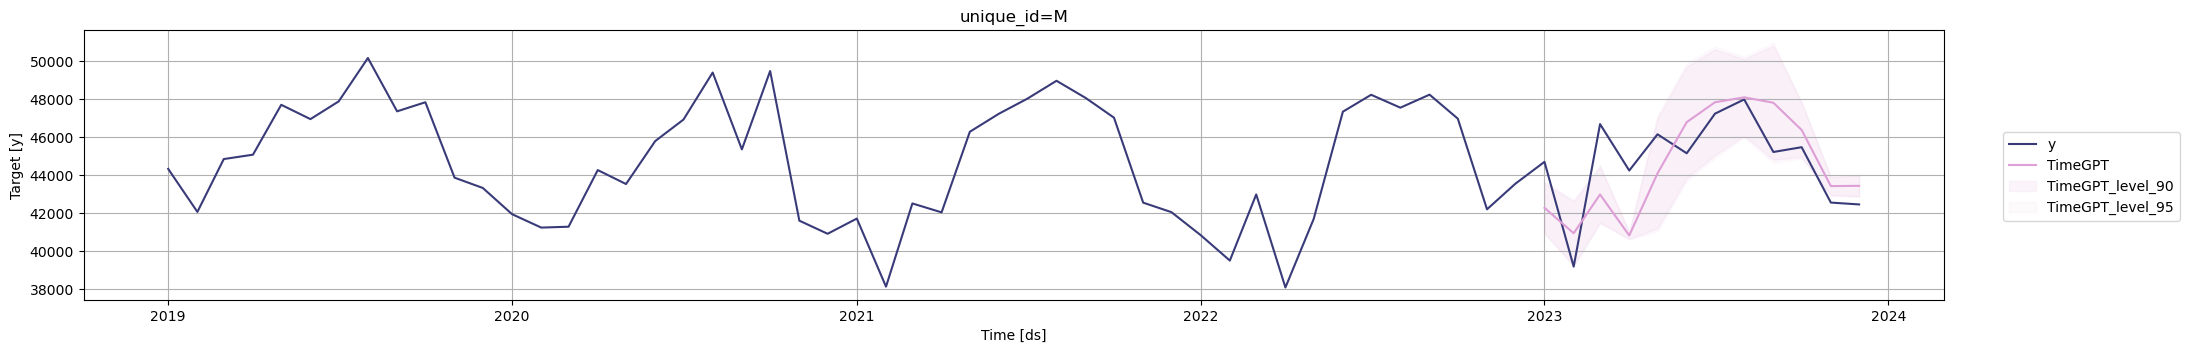

In [45]:
nix_mcom = nixtla_client.forecast(tr_mcom_sf, h=12, freq='MS', model='timegpt-1-long-horizon', level=[90, 95])
# 4. Plot your results (optional)
nixtla_client.plot(mcom_sf, nix_mcom, time_col='ds', target_col='y', level=[90, 95])

In [46]:
nix_mcom

,unique_id,ds,TimeGPT,TimeGPT-lo-95,TimeGPT-lo-90,TimeGPT-hi-90,TimeGPT-hi-95
0,M,2023-01-01,"42,270.73","40,883.07","40,956.10","43,585.35","43,658.39"
1,M,2023-02-01,"40,931.84","39,166.49","39,259.40","42,604.29","42,697.20"
2,M,2023-03-01,"42,973.70","41,430.31","41,511.54","44,435.85","44,517.09"
3,M,2023-04-01,"40,812.61","40,618.38","40,628.60","40,996.62","41,006.84"
4,M,2023-05-01,"44,088.55","41,032.30","41,193.15","46,983.96","47,144.81"
5,M,2023-06-01,"46,785.11","43,681.29","43,844.64","49,725.58","49,888.94"
6,M,2023-07-01,"47,832.83","44,889.99","45,044.88","50,620.78","50,775.66"
7,M,2023-08-01,"48,093.43","45,967.45","46,079.34","50,107.52","50,219.41"
8,M,2023-09-01,"47,807.36","44,631.47","44,798.62","50,816.09","50,983.25"
9,M,2023-10-01,"46,373.52","44,883.21","44,961.65","47,785.38","47,863.82"


In [47]:
mcom_nix_mape = mape(tst_mcom_sf['y'], nix_mcom['TimeGPT'])
mcom_nix_mape

0.03939193337820155

In [48]:
from prophet import Prophet

In [49]:
mcom_p = mcom
mcom_p.rename(columns={'ds':'ds', 'mco':'y'}, inplace=True)

tr_mcom_p = mcom_p[:48]
tst_mcom_p = mcom_p[48:]

In [50]:
mcom_pmod = Prophet()
mcom_pmod.fit(tr_mcom_p)

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: C:\Users\trdun\AppData\Local\Temp\tmpxf9p2hp2\rjf7s8tp.json
DEBUG:cmdstanpy:input tempfile: C:\Users\trdun\AppData\Local\Temp\tmpxf9p2hp2\xz4frgrd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\trdun\\anaconda3\\envs\\arima\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=5144', 'data', 'file=C:\\Users\\trdun\\AppData\\Local\\Temp\\tmpxf9p2hp2\\rjf7s8tp.json', 'init=C:\\Users\\trdun\\AppData\\Local\\Temp\\tmpxf9p2hp2\\xz4frgrd.json', 'output', 'file=C:\\Users\\trdun\\AppData\\Local\\Temp\\tmpxf9p2hp2\\prophet_modelvuoggj4e\\prophet_model-20240802234810.csv', 'm

In [51]:
mcom_pf = mcom_pmod.make_future_dataframe(periods=12, freq='MS')
mcom_pf

mcom_pdata = mcom_pmod.predict(mcom_pf)
mcom_pdata

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,...,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,"46,703.56","42,109.15","44,896.02","46,703.56","46,703.56",...,"-3,107.70","-3,107.70",0.00,0.00,0.00,"43,595.86"
1,2019-02-01,"46,571.16","40,627.75","43,335.45","46,571.16","46,571.16",...,"-4,652.11","-4,652.11",0.00,0.00,0.00,"41,919.05"
2,2019-03-01,"46,451.57","43,484.17","46,179.87","46,451.57","46,451.57",...,"-1,671.26","-1,671.26",0.00,0.00,0.00,"44,780.31"
3,2019-04-01,"46,319.17","41,216.36","43,959.79","46,319.17","46,319.17",...,"-3,749.82","-3,749.82",0.00,0.00,0.00,"42,569.35"
4,2019-05-01,"46,191.04","45,248.75","47,953.36","46,191.04","46,191.04",...,473.15,473.15,0.00,0.00,0.00,"46,664.19"
5,2019-06-01,"46,058.64","46,818.49","49,578.46","46,058.64","46,058.64",...,"2,145.61","2,145.61",0.00,0.00,0.00,"48,204.25"
6,2019-07-01,"45,930.51","47,776.16","50,457.55","45,930.51","45,930.51",...,"3,204.72","3,204.72",0.00,0.00,0.00,"49,135.22"
7,2019-08-01,"45,798.10","48,764.29","51,418.38","45,798.10","45,798.10",...,"4,256.75","4,256.75",0.00,0.00,0.00,"50,054.86"
8,2019-09-01,"45,665.73","47,544.04","50,360.73","45,665.73","45,665.73",...,"3,301.47","3,301.47",0.00,0.00,0.00,"48,967.21"
9,2019-10-01,"45,537.63","46,311.84","48,930.36","45,537.63","45,537.63",...,"2,116.52","2,116.52",0.00,0.00,0.00,"47,654.15"


In [52]:
from permetrics import RegressionMetric
list_metrics = ["MSE","MAE","MedAE","MAPE", "SMAPE", "MASE", "RMSE", "R2"]

In [53]:
mcom_true = tst_mcom['mco'].tolist()
mcom_pred = mcom_pred1['predicted_volume'].tolist()

mcom_eval = RegressionMetric(mcom_true, mcom_pred)

mcom_reslist = []

for metric in list_metrics:
    mcom_reslist.append(mcom_eval.get_metric_by_name(metric))

print(mcom_reslist)

[{'MSE': 24430671.975047603}, {'MAE': 4252.35516261814}, {'MedAE': 4870.142496610228}, {'MAPE': 0.0953700507275078}, {'SMAPE': 0.04501362574290276}, {'MASE': 1.7161691660111364}, {'RMSE': 4942.739318945275}, {'R2': -3.5336683769694757}]
